In [ ]:
'''
Data analysis for the beer dataset
'''

In [66]:
# packages

# standard numerical
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from pprint import pprint

# to process text
import re 
import nltk
import json
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import operator
import datetime
import unidecode
from pprint import pprint
from collections import defaultdict
import collections
import os

# to carry out topic modeling
import gensim
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import ldamodel as lda

In [7]:
# read data
beer_data = pd.read_csv('beer_data_set.csv')
beer_data.head().T

0  \
Name                                                     Amber   
key                                                        251   
Style                                                  Altbier   
Style Key                                                    8   
Brewery                                    Alaskan Brewing Co.   
Description  Notes:Richly malty and long on the palate, wit...   
ABV                                                        5.3   
Ave Rating                                                3.65   
Min IBU                                                     25   
Max IBU                                                     50   
Astringency                                                 13   
Body                                                        32   
Alcohol                                                      9   
Bitter                                                      47   
Sweet                                                       74   
Sour                                                        33   
Salty                                                        0   
Fruits                                                      33   
Hoppy                                                       57   
Spices                                                       8   
Malty                                                      111   

                                                             1  \
Name                                                Double Bag   
key                                                        252   
Style                                                  Altbier   
Style Key                                                    8   
Brewery                                 Long Trail Brewing Co.   
Description  Notes:This malty, full-bodied double alt is al...   
ABV                                                        7.2   
Ave Rating                                                 3.9   
Min IBU                                                     25   
Max IBU                                                     50   
Astringency                                                 12   
Body                                                        57   
Alcohol                                                     18   
Bitter                                                      33   
Sweet                                                       55   
Sour                                                        16   
Salty                                                        0   
Fruits                                                      24   
Hoppy                                                       35   
Spices                                                      12   
Malty                                                       84   

                                                             2  \
Name                                            Long Trail Ale   
key                                                        253   
Style                                                  Altbier   
Style Key                                                    8   
Brewery                                 Long Trail Brewing Co.   
Description  Notes:Long Trail Ale is a full-bodied amber al...   
ABV                                                        5.0   
Ave Rating                                                3.58   
Min IBU                                                     25   
Max IBU                                                     50   
Astringency                                                 14   
Body                                                        37   
Alcohol                                                      6   
Bitter                                                      42   
Sweet                                                       43   
Sour                                                        11   
Salty                            

In [20]:
# inspect na values
print(beer_data.isna().any())

Name            True
key            False
Style          False
Style Key      False
Brewery        False
Description    False
ABV            False
Ave Rating     False
Min IBU        False
Max IBU        False
Astringency    False
Body           False
Alcohol        False
Bitter         False
Sweet          False
Sour           False
Salty          False
Fruits         False
Hoppy          False
Spices         False
Malty          False
dtype: bool


In [19]:
# inspect unique values
print(beer_data.nunique())

Name           5317
key            5558
Style           112
Style Key       112
Brewery        1498
Description    3347
ABV             229
Ave Rating      289
Min IBU          21
Max IBU          25
Astringency      73
Body            165
Alcohol         116
Bitter          141
Sweet           191
Sour            222
Salty            47
Fruits          185
Hoppy           156
Spices          155
Malty           217
dtype: int64


In [26]:
# Beers without description
beer_data.loc[beer_data["Description"]=="Notes:",]

Name  key          Style  Style Key  \
3              Doppelsticke  254        Altbier          8   
6                    Sticke  257        Altbier          8   
8       Southampton Altbier  259        Altbier          8   
10      Organic Münster Alt  261        Altbier          8   
20          Alt-eration Ale  271        Altbier          8   
...                     ...  ...            ...        ...   
5547          Winter Warmer  690  Winter Warmer         17   
5548  Young's Winter Warmer  691  Winter Warmer         17   
5550        Winter Shredder  693  Winter Warmer         17   
5553    Red Nose Winter Ale  696  Winter Warmer         17   
5555   Fish Tale Winterfish  698  Winter Warmer         17   

                                      Brewery Description  ABV  Ave Rating  \
3              Uerige Obergärige Hausbrauerei      Notes:  8.5        4.15   
6              Uerige Obergärige Hausbrauerei      Notes:  6.0        4.10   
8                   Southampton Publick House      Notes:  5.0        3.60   
10                    Brauerei Pinkus Mueller      Notes:  5.1        3.70   
20                       Hops & Grain Brewing      Notes:  5.0        3.81   
...                                       ...         ...  ...         ...   
5547              Rahr & Sons Brewing Company      Notes:  8.5        3.76   
5548                            Eagle Brewery      Notes:  5.0        3.55   
5550                       Cisco Brewers Inc.      Notes:  8.8        3.38   
5553         Natty Greene's Pub & Brewing Co.      Notes:  6.8        3.59   
5555  Fish Brewing Company / Fishbowl Brewpub      Notes:  7.5        3.76   

      Min IBU  Max IBU  ...  Body  Alcohol  Bitter  Sweet  Sour  Salty  \
3          25       50  ...    55       31      47    101    18      1   
6          25       50  ...    45       13      46     62    25      1   
8          25       50  ...    49        5      37     73    22      0   
10         25       50  ...    31        5      35     50    55      5   
20         25       50  ...    43        3      54     54     7      0   
...       ...      ...  ...   ...      ...     ...    ...   ...    ...   
5547       35       50  ...    67       31      46     67    11      0   
5548       35       50  ...    67       17      28     73    19      0   
5550       35       50  ...    37       24      35     46    19      0   
5553       35       50  ...    44       24      19     52    21      0   
5555       35       50  ...    36       50      70     72    59      0   

      Fruits  Hoppy  Spices  Malty  
3         49     40      16    119  
6         34     60       4    103  
8         21     37       4     98  
10        52     66       8     77  
20        10     60       9    111  
...      ...    ...     ...    ...  
5547      24     24      28    100  
5548      19     32      43    100  
5550      23     45      67     74  
5553      26     21      96     77  
5555      81    110      18     73  

[2196 rows x 21 columns]

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

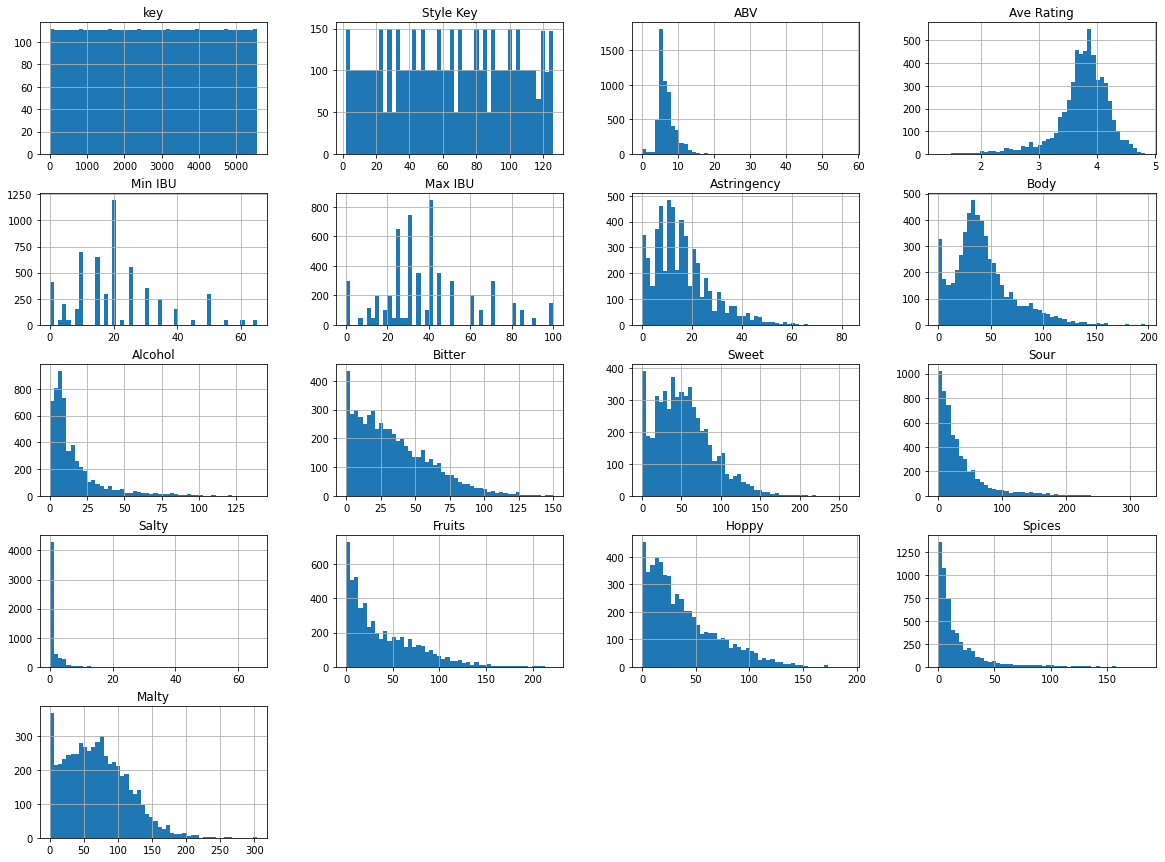

In [8]:
# visually inspect the data
beer_data.hist(bins=50, figsize=(20,15))

### Pre-processing

In [53]:
## Data cleaning
# drop Name
df_beer = beer_data.drop(['Name'], axis = 1)

# drop rows when "Description" column contains "Notes:" and "error entering this description"
df_beer = df_beer.loc[df_beer["Description"]!="Notes:",].reset_index(drop=True)
df_beer = df_beer.loc[df_beer["Description"]!="error entering this description",].reset_index(drop=True)
df_beer

key          Style  Style Key                               Brewery  \
0     251        Altbier          8                   Alaskan Brewing Co.   
1     252        Altbier          8                Long Trail Brewing Co.   
2     253        Altbier          8                Long Trail Brewing Co.   
3     255        Altbier          8                     Off Color Brewing   
4     256        Altbier          8               Ninkasi Brewing Company   
...   ...            ...        ...                                   ...   
3355  692  Winter Warmer         17  Indeed Brewing Company - Minneapolis   
3356  695  Winter Warmer         17            RJ Rockers Brewing Company   
3357  697  Winter Warmer         17                Anchor Brewing Company   
3358  699  Winter Warmer         17               Shmaltz Brewing Company   
3359  700  Winter Warmer         17                  Hoppin' Frog Brewery   

                                            Description  ABV  Ave Rating  \
0     Notes:Richly malty and long on the palate, wit...  5.3        3.65   
1     Notes:This malty, full-bodied double alt is al...  7.2        3.90   
2     Notes:Long Trail Ale is a full-bodied amber al...  5.0        3.58   
3     Notes:Just cause it's dark and German doesn't ...  5.3        3.67   
4     Notes:Called 'Dark Double Alt' on the label.Se...  7.2        3.78   
...                                                 ...  ...         ...   
3355  Notes:A new season means new adventures. We cr...  6.5        3.86   
3356  Notes:This hearty American pale ale contains a...  6.0        3.63   
3357  Notes:This is the forty-fifth annual Our Speci...  6.9        3.79   
3358  Notes:Chanukah Beer pours a rich crystal clear...  8.0        3.61   
3359  Notes:The essence of Christmas is captured in ...  8.6        3.89   

      Min IBU  Max IBU  Astringency  Body  Alcohol  Bitter  Sweet  Sour  \
0          25       50           13    32        9      47     74    33   
1          25       50           12    57       18      33     55    16   
2          25       50           14    37        6      42     43    11   
3          25       50           21    69       10      63    120    14   
4          25       50           25    51       26      44     45     9   
...       ...      ...          ...   ...      ...     ...    ...   ...   
3355       35       50            9    72       26      48    104    27   
3356       35       50           15    31       23      16     54    43   
3357       35       50           22    73        9      58     87    23   
3358       35       50            6    64       30      57     78    15   
3359       35       50            8    50       49      13     71    17   

      Salty  Fruits  Hoppy  Spices  Malty  
0         0      33     57       8    111  
1         0      24     35      12     84  
2         0      10     54       4     62  
3         0      19     36      15    218  
4         1      11     51      20     95  
...     ...     ...    ...     ...    ...  
3355      1      43     29      27     96  
3356      0      54     14     140     58  
3357      0      48     91      44    104  
3358      1      28     57      23    129  
3359      0      33     16     148     69  

[3360 rows x 20 columns]

### NLP Pre-processing

In [63]:
# Change abstract data to a list as easier to work with
description = df_beer['Description'].values.tolist()

# Note 'pprint' is just a more visually appealing version of print - standing for 'pretty print'

pprint(description[:3])

['Notes:Richly malty and long on the palate, with just enough hop backing to '
 'make this beautiful amber colored "alt" style beer notably well balanced.\t',
 'Notes:This malty, full-bodied double alt is also known as “Stickebier” – '
 'German slang for “secret brew”. Long Trail Double Bag was originally offered '
 'only in our brewery taproom as a special treat to our visitors. With an '
 'alcohol content of 7.2%, please indulge in moderation. The Long Trail '
 'Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of '
 'the Year” in 2001. Malt Advocate is a national magazine devoted to '
 '“expanding the boundaries of fine drinks”. Their panel of judges likes to '
 'keep things simple, and therefore of thousands of eligible competitors they '
 'award only two categories: “Imported” and “Domestic”. It is a great honor to '
 'receive this recognition.33 IBU\t',
 'Notes:Long Trail Ale is a full-bodied amber ale modeled after the '
 '“Alt-biers” of Düsseldorf, Germany

In [65]:
# data cleaning
start = datetime.datetime.now()

data2 = []

for details in range(0, len(description)):
    
    # Remove all the special characters
    p_data = re.sub(r'\W', ' ', str(description[details]))
    p_data = unidecode.unidecode(p_data)      ### remove images

    # remove all single characters
    p_data = re.sub(r'\s+[a-zA-Z]\s+', ' ', p_data)    ### if there is a space+(a-z)+another space, replace with nothing
    p_data = re.sub(r'\^[a-zA-Z]\s+', ' ', p_data) 
    
    # remove all numbers
    p_data = re.sub(r'\d+','', p_data)     ### d stands for digits, find it and replace with nothing

    # substitute multiple white spaces with single space
    p_data = re.sub(r'\s+', ' ', p_data, flags=re.I)

    # Remove prefixed 'b'
    p_data = re.sub(r'^b\s+', '', p_data)
    

    data2.append(p_data)
    
print('Basic pre-processing of dataset took %s' % str(datetime.datetime.now() - start))
pprint(data2[:3])

Basic pre-processing of dataset took 0:00:00.195770
['Notes Richly malty and long on the palate with just enough hop backing to '
 'make this beautiful amber colored alt style beer notably well balanced ',
 'Notes This malty full bodied double alt is also known as Stickebier German '
 'slang for secret brew Long Trail Double Bag was originally offered only in '
 'our brewery taproom as special treat to our visitors With an alcohol content '
 'of please indulge in moderation The Long Trail Brewing Company is proud to '
 'have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is '
 'national magazine devoted to expanding the boundaries of fine drinks Their '
 'panel of judges likes to keep things simple and therefore of thousands of '
 'eligible competitors they award only two categories Imported and Domestic It '
 'is great honor to receive this recognition IBU ',
 'Notes Long Trail Ale is full bodied amber ale modeled after the Alt biers of '
 'Dusseldorf Germany Our top

In [67]:
# Pre-processing: Change tweets to bag-of-words

def sent_to_words(details):
    for detail in details:
        yield(gensim.utils.simple_preprocess(str(detail), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data2))

count = sum([len(detail) for detail in data_words])
print('Total number of terms across all tweets is: ', count)
 
print(data_words[:3])

Total number of terms across all tweets is:  181214
[['notes', 'richly', 'malty', 'and', 'long', 'on', 'the', 'palate', 'with', 'just', 'enough', 'hop', 'backing', 'to', 'make', 'this', 'beautiful', 'amber', 'colored', 'alt', 'style', 'beer', 'notably', 'well', 'balanced'], ['notes', 'this', 'malty', 'full', 'bodied', 'double', 'alt', 'is', 'also', 'known', 'as', 'stickebier', 'german', 'slang', 'for', 'secret', 'brew', 'long', 'trail', 'double', 'bag', 'was', 'originally', 'offered', 'only', 'in', 'our', 'brewery', 'taproom', 'as', 'special', 'treat', 'to', 'our', 'visitors', 'with', 'an', 'alcohol', 'content', 'of', 'please', 'indulge', 'in', 'moderation', 'the', 'long', 'trail', 'brewing', 'company', 'is', 'proud', 'to', 'have', 'double', 'bag', 'named', 'malt', 'advocate', 'beer', 'of', 'the', 'year', 'in', 'malt', 'advocate', 'is', 'national', 'magazine', 'devoted', 'to', 'expanding', 'the', 'boundaries', 'of', 'fine', 'drinks', 'their', 'panel', 'of', 'judges', 'likes', 'to', 'ke